In [1]:
# Importing Libraries and Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

## Objectives of Project 
- To know which promotion is most successful
- To know which promotion encourages users to spend the most
- To know which promotion is most effective/efficent (as per successful_payment)

### Other objectives
- Best Regions?
- Distribution of Devices
- Demography of customers 

### Data Exploration

In [6]:
# Read Dataset
df = pd.read_csv(r'ab_test_payment_gateway.csv')
df.head()

,User_ID,Age,Gender,Region,Device,Payment_Method,Promotion,Successful_Payment,Transaction_Amount
0,1,56.0,Male,West,Desktop,Bank Transfer,Discount,0,57.57
1,2,46.0,Female,West,Mobile,Bank Transfer,Cashback,0,51.64
2,3,32.0,Female,South,Desktop,Bank Transfer,No Promo,1,30.37
3,4,60.0,Male,North,Mobile,Credit Card,No Promo,0,98.45
4,5,25.0,Male,West,Mobile,Credit Card,Free Trial,1,77.26


In [7]:
# exploring columns 
df.columns

Index(['User_ID', 'Age', 'Gender', 'Region', 'Device', 'Payment_Method',
       'Promotion', 'Successful_Payment', 'Transaction_Amount'],
      dtype='object')

In [16]:
# Feature Engineering
# Creating an Age range column
age_group = []
for age in df['Age']:
    if age <= 29:
        age_group.append('Young Adult')
    elif age <= 39:
        age_group.append('Adult')
    elif age <= 49:
        age_group.append('Middle-Aged')
    else:
        age_group.append('Old Adult')
df['age_group'] = pd.Series(age_group)
# df['age_group'].head(1)

In [7]:
# Number of inputs in dataset
df.shape

(4000, 9)

In [18]:
# description of numerical features
df.describe()

,User_ID,Age,Successful_Payment,Transaction_Amount
count,4000.000000,3900.000000,4000.000000,4000.000000
mean,2000.500000,41.206410,0.605500,51.313754
std,1154.844867,13.520788,0.488804,39.043909
min,1.000000,18.000000,0.000000,-23.100000
25%,1000.750000,29.000000,0.000000,36.160000
50%,2000.500000,41.000000,1.000000,49.945000
75%,3000.250000,53.000000,1.000000,62.890000
max,4000.000000,64.000000,1.000000,942.780812


In [19]:
# Description of categorical features
df.describe(exclude=('int','float'))

,Gender,Region,Device,Payment_Method,Promotion,age_group
count,4000,4000,4000,4000,3920,4000
unique,3,4,3,4,4,4
top,Male,South,Desktop,Credit Card,Cashback,Old Adult
freq,1946,1053,1831,1538,1165,1379


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             4000 non-null   int64  
 1   Age                 3900 non-null   float64
 2   Gender              4000 non-null   object 
 3   Region              4000 non-null   object 
 4   Device              4000 non-null   object 
 5   Payment_Method      4000 non-null   object 
 6   Promotion           3920 non-null   object 
 7   Successful_Payment  4000 non-null   int64  
 8   Transaction_Amount  4000 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 281.4+ KB


I would rather reformat the Age column from float into an int. <br>
But we have to sort the missing entries in the column first

In [13]:
# Checking for duplicate entries
df.duplicated().sum()

0

In [14]:
# Checking for missing entries
df.isna().sum()

User_ID                 0
Age                   100
Gender                  0
Region                  0
Device                  0
Payment_Method          0
Promotion              80
Successful_Payment      0
Transaction_Amount      0
dtype: int64

180 total missing values in Age(100) and Promotion(80) columns

In [26]:
# Dropping Null Values and Converting Age to Int dtype
df = df.dropna()
df['Age'] = df['Age'].astype(int)
# print(f"{df['Age'].info()} {df.isnull().sum()}")

In [27]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Region', 'Device', 'Payment_Method',
       'Promotion', 'Successful_Payment', 'Transaction_Amount', 'age_group'],
      dtype='object')

### Exploratory Data Analysis

#### To know which promotion is most successful
<!-- Define your success metric -->
- rate of Successful Payments
- avg transaction amount


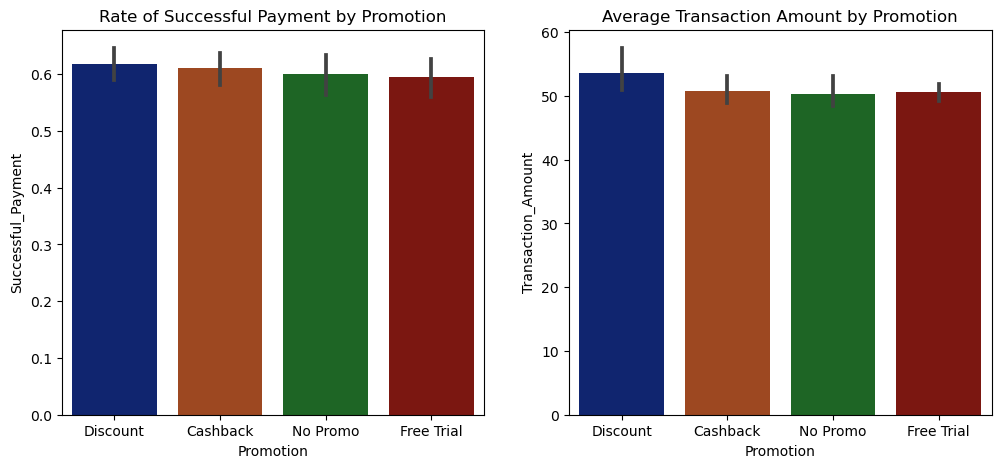

In [39]:
# Rate of Successful Payments and AVG Transaction amount by Promotion
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.barplot(data=df,
            x='Promotion',
            y='Successful_Payment',
            palette='dark',
            ax=ax[0]);
ax[0].set_title('Rate of Successful Payment by Promotion')
sns.barplot(data=df,
            x='Promotion',
            y='Transaction_Amount',
            palette='dark',
            ax=ax[1])
ax[1].set_title('Average Transaction Amount by Promotion');

**Insights** <br>
**Rate of Successful Payments**
- ...
- ...

**Average Transaction Amount**
- ...
- ...

#### To know which promotion encourages users to spend the most
<!-- Metric -->
- No of transactions per promotion
- avg transaction amount?? 

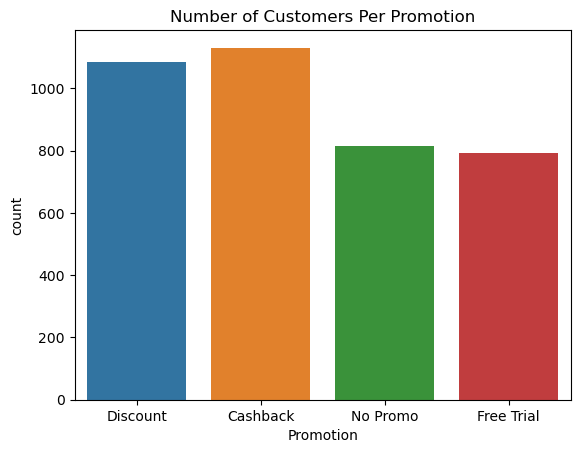

In [43]:
 # No of transactions per promotion
# plt.figure(figsize=(10,8))
sns.countplot(x=df['Promotion'])
plt.title('Number of Customers Per Promotion');

**Insights**
- ...

#### To know which promotion is most effective/efficient (as per successful_payment)
- Percentage of failed/successful transactions

In [45]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Region', 'Device', 'Payment_Method',
       'Promotion', 'Successful_Payment', 'Transaction_Amount', 'age_group'],
      dtype='object')

In [97]:
# Percentage of failed/successful transactions
promotions = df['Promotion'].value_counts()
success_per_promtoion = df['Promotion'].loc[df['Successful_Payment']==1].value_counts()
percentage = round((success_per_promtoion/promotions)*100)
print(percentage)

Promotion
Cashback      61.0
Discount      62.0
No Promo      60.0
Free Trial    59.0
Name: count, dtype: float64


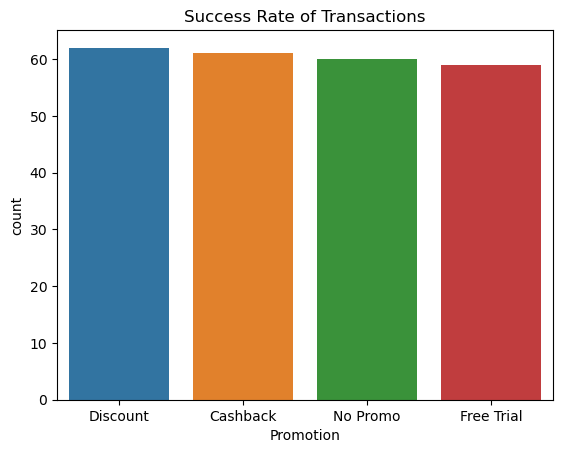

In [98]:
order = percentage.reset_index().sort_values('count', ascending=False)['Promotion']
sns.barplot(data=percentage.reset_index(), 
            x='Promotion',
            y='count',
            order=order
           )
plt.title('Success Rate of Transactions');

In [51]:
df['Promotion'].loc[df['Successful_Payment']==1].value_counts()

Promotion
Cashback      690
Discount      670
No Promo      490
Free Trial    471
Name: count, dtype: int64

### Univariate Analysis

### Bivariate Analysis